In [1533]:
import numpy as np # 선형 대수
import pandas as pd # 데이터 처리
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화
import os # 현재 작업 경로를 얻는 함수
import warnings # 경고 메시지 무시
warnings.filterwarnings('ignore') # 경고 메시지 무시


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [1534]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
print(train.head())
print(test.head())
print(submission.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [1535]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1536]:
#결측치 확인하기
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [1537]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1538]:
# Survived' 열에서 각 값의 개수를 계산합니다. 이를 통해 '사망'과 '생존'의 개수를 확인할 수 있습니다.
train['Survived'].value_counts()

#'Survived' 열을 기준으로 데이터프레임을 그룹화하고 각 그룹의 크기를 계산합니다
tmp_df = (train
          .groupby('Survived')
          .size()
          .reset_index(name='count') # 결과를 데이터프레임으로 리셋하고, 새로운 열 이름을 'count'로 지정합니다.
          .assign(Survived = lambda df: np.where(df['Survived']==0, 'Dead', 'Alive'))
          )
tmp_df


,Survived,count
0,Dead,549
1,Alive,342


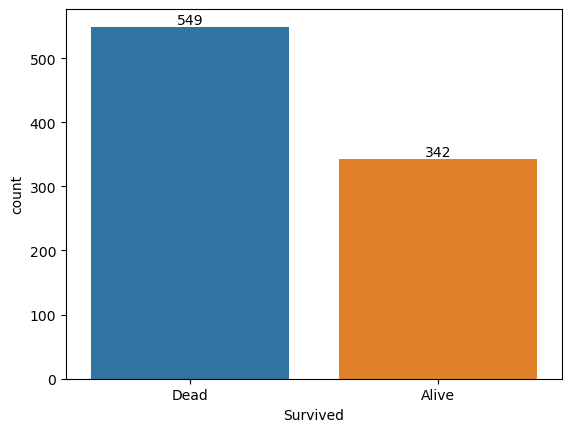

In [1539]:
g = sns.barplot(data=tmp_df, x='Survived', y='count')
g.bar_label(g.containers[0])
plt.show()

# plt.pie(x=tmp_df['count'], labels=tmp_df['Survived'], autopct='%.1f%%')
# plt.show()

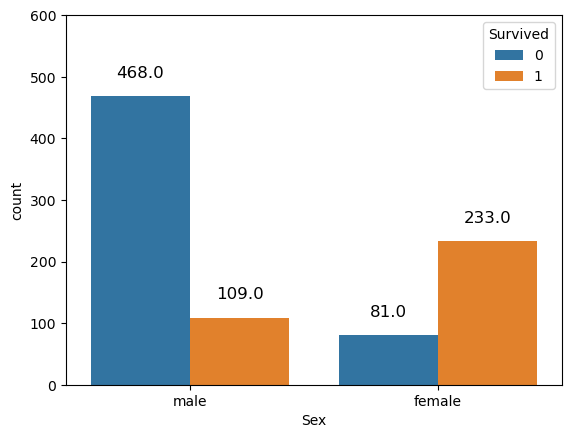

In [1540]:
#성별을 기준으로 살아남은 사람
ax = sns.countplot(data=train, x='Sex', hue='Survived')

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 600)

plt.show()

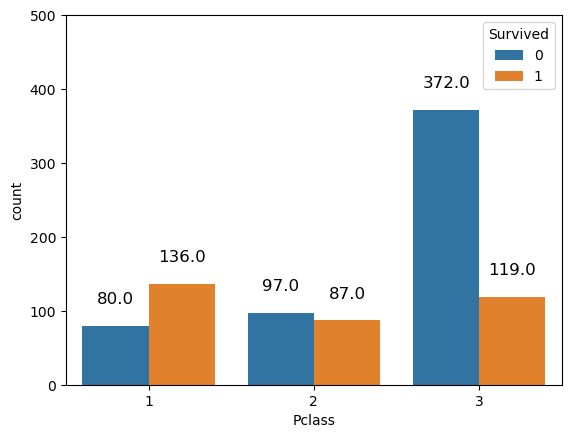

In [1541]:
#pclas 객실 등급을 기준으로 생존률
ax = sns.countplot(data=train, x='Pclass', hue='Survived')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 500)

plt.show()

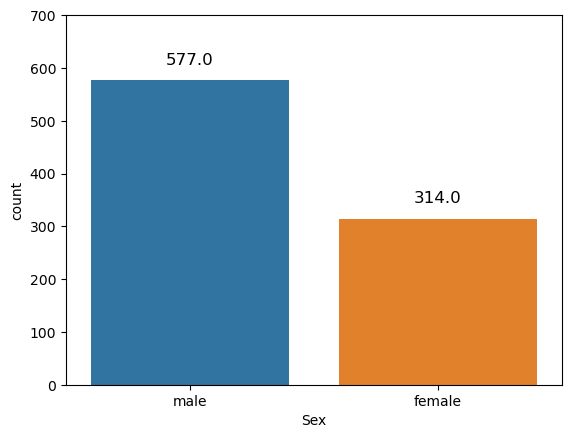

In [1542]:
# 남 여 기준으로 생존률
ax = sns.countplot(data=train, x='Sex')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 700)

plt.show()

29.69911764705882

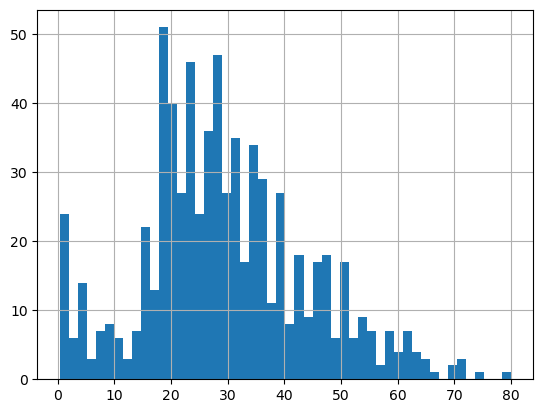

In [1543]:
train['Age'].hist(bins=50)
train['Age'].mean()

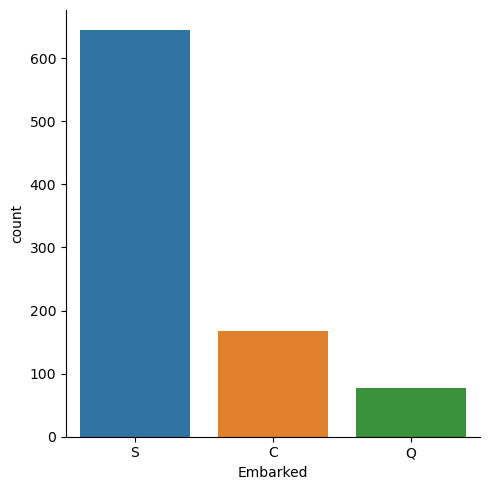

In [1544]:
sns.catplot(x='Embarked',data=train,kind='count')

In [1545]:
# # 나이의 null 값을 평균을 기준으로 입력
# train["Age"].fillna(train["Age"].mean(), inplace = True)
# test["Age"].fillna(test["Age"].mean(), inplace = True)

In [1546]:
# 나이 null값 확인
train["Age"].isnull().sum()
test["Age"].isnull().sum()

86

In [1547]:
# 승선한 항 갯수 새기
train["Embarked"].value_counts().sort_values(ascending = False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1548]:
# null 값아 가장 많이 승선한 Southampton 값으로 입력
train["Embarked"].fillna("S", inplace = True)

In [1549]:
# Embarked null 값 개수 총합 확인
train["Embarked"].isnull().sum() 

0

In [1550]:
#성별 숫자 코드로 변환
train['Sex_clean'] = train['Sex'].astype('category').cat.codes
test['Sex_clean'] = test['Sex'].astype('category').cat.codes

In [1551]:
#금액 평균 값으로 데이터 입력
test["Fare"].fillna(test["Fare"].mean(), inplace = True)

In [1552]:
train['Embarked'].isnull().sum()
# 2

test['Embarked'].isnull().sum()
# 0

train['Embarked'].value_counts()
# output
# S    644
# C    168
# Q     77

train['Embarked'].fillna('S', inplace=True)

train['Embarked_clean'] = train['Embarked'].astype('category').cat.codes
test['Embarked_clean'] = test['Embarked'].astype('category').cat.codes

In [1553]:
# 가족
train['Family'] = 1 + train['SibSp'] + train['Parch']
test['Family'] = 1 + test['SibSp'] + test['Parch']

In [1554]:
# 혼자
train['Solo'] = (train['Family'] == 1)
test['Solo'] = (test['Family'] == 1)

In [1555]:
# 운임 요금 구간별 분리
train['FareBin'] = pd.qcut(train['Fare'], 5)
test['FareBin'] = pd.qcut(test['Fare'], 5)

train['FareBin'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: FareBin, dtype: int64

In [1556]:
# 각 범주 숫자 코드로 매핑
train['Fare_clean'] = train['FareBin'].astype('category').cat.codes
test['Fare_clean'] = test['FareBin'].astype('category').cat.codes

train['Fare_clean'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: Fare_clean, dtype: int64

In [1557]:
# 이름 확인
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      23
Mlle        2
Mme         1
Ms          1
Name: Title, dtype: int64

In [1558]:
# 이름 전처리
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

In [1559]:
# 이름 확안
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

test['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

In [1560]:
# 이름 숫자로 변경
train['Title_clean'] = train['Title'].astype('category').cat.codes
test['Title_clean'] = test['Title'].astype('category').cat.codes

In [1561]:
#나이 전처리
train['Age'].isnull().sum()
# 177

test['Age'].isnull().sum()
# 86

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [1562]:
# Train 나이 구분
train.loc[ train['Age'] <= 10, 'Age_clean'] = 0
train.loc[(train['Age'] > 10) & (train['Age'] <= 16), 'Age_clean'] = 1
train.loc[(train['Age'] > 16) & (train['Age'] <= 20), 'Age_clean'] = 2
train.loc[(train['Age'] > 20) & (train['Age'] <= 26), 'Age_clean'] = 3
train.loc[(train['Age'] > 26) & (train['Age'] <= 30), 'Age_clean'] = 4
train.loc[(train['Age'] > 30) & (train['Age'] <= 36), 'Age_clean'] = 5
train.loc[(train['Age'] > 36) & (train['Age'] <= 40), 'Age_clean'] = 6
train.loc[(train['Age'] > 40) & (train['Age'] <= 46), 'Age_clean'] = 7
train.loc[(train['Age'] > 46) & (train['Age'] <= 50), 'Age_clean'] = 8
train.loc[(train['Age'] > 50) & (train['Age'] <= 60), 'Age_clean'] = 9
train.loc[ train['Age'] > 60, 'Age_clean'] = 10

# Test
test.loc[ test['Age'] <= 10, 'Age_clean'] = 0
test.loc[(test['Age'] > 10) & (test['Age'] <= 16), 'Age_clean'] = 1
test.loc[(test['Age'] > 16) & (test['Age'] <= 20), 'Age_clean'] = 2
test.loc[(test['Age'] > 20) & (test['Age'] <= 26), 'Age_clean'] = 3
test.loc[(test['Age'] > 26) & (test['Age'] <= 30), 'Age_clean'] = 4
test.loc[(test['Age'] > 30) & (test['Age'] <= 36), 'Age_clean'] = 5
test.loc[(test['Age'] > 36) & (test['Age'] <= 40), 'Age_clean'] = 6
test.loc[(test['Age'] > 40) & (test['Age'] <= 46), 'Age_clean'] = 7
test.loc[(test['Age'] > 46) & (test['Age'] <= 50), 'Age_clean'] = 8
test.loc[(test['Age'] > 50) & (test['Age'] <= 60), 'Age_clean'] = 9
test.loc[ test['Age'] > 60, 'Age_clean'] = 10

In [1563]:
# Cabin 데이터 갯수
train['Cabin'].str[:1].value_counts()


C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [1564]:
#cabin 데이터 숫자로 변경
mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'T': 7
}

# 객실 영어만 가져옴
train['Cabin_clean'] = train['Cabin'].str[:1]
train['Cabin_clean'] = train['Cabin_clean'].map(mapping)
train['Cabin_clean'] = train.groupby('Pclass')['Cabin_clean'].transform('median')

test['Cabin_clean'] = test['Cabin'].str[:1]
test['Cabin_clean'] = test['Cabin_clean'].map(mapping)
test['Cabin_clean'] = test.groupby('Pclass')['Cabin_clean'].transform('median')

train['Cabin_clean'].value_counts()

5.0    491
2.0    216
4.5    184
Name: Cabin_clean, dtype: int64

In [1566]:
test['Cabin_clean'].value_counts()

5.0    311
2.0    107
Name: Cabin_clean, dtype: int64

In [1567]:
#훈련 및 테스트에 사용할 특징과 레이블 변수를 정의하는 작업입니다
feature = [
    'Pclass',
    'SibSp',
    'Parch',
    'Sex_clean',
    'Embarked_clean',
    'Family',
    'Solo',
    'Title_clean',
    'Age_clean',
    'Cabin_clean',
    'Fare_clean',
]

label = [
    'Survived',
]

In [1568]:
# # 필요한 라이브러리를 임포트합니다.
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import PolynomialFeatures

# # PolynomialFeatures를 사용하여 다항식 특징을 생성합니다.
# poly = PolynomialFeatures(include_bias = False)

# #훈련 데이터와 테스트 데이터를 준비합니다.
# train_data = train[feature]
# train_target = train[label]

# test_data = test[feature]
# test_target = submission[label]

# #RandomForestClassifier를 초기화하고, 훈련 데이터에 대해 모델을 학습

# clf = RandomForestClassifier(n_estimators=50, max_depth=6,n_jobs = -1)
# poly.fit(train_data)
# train_poly = poly.transform(train_data)
# clf.fit(train_poly, train_target)

# #학습된 모델의 성능을 평가하고 출력합니다.
# print(clf.score(train_poly, train_target))

# # 테스트 데이터에 대해 모델을 평가하고 출력합니다.
# test_poly = poly.transform(test_data)
# print(clf.score(test_poly, test_target))

# # 모델을 사용하여 테스트 데이터에 대한 예측을 수행합니다.
# a = clf.predict(test_poly)
# a = np.reshape(a, (418,1))

# # # 예측 결과를 submission 데이터프레임의 'Survived' 열에 저장합니다.
# # submission['Survived'] = a
# # submission.to_csv('titanic-submission.csv',index=False)


In [1581]:
# 필요한 라이브러리를 임포트합니다.
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier

# PolynomialFeatures를 사용하여 다항식 특징을 생성합니다.
poly = PolynomialFeatures(include_bias = False)


#훈련 데이터와 테스트 데이터를 준비합니다.
train_data = train[feature]
train_target = train[label]

test_data = test[feature]
test_target = submission[label]

# GradientBoostingClassifier 초기화하고, 훈련 데이터에 대해 모델을 학습
clf = GradientBoostingClassifier(n_estimators=500, max_depth=60,random_state=1)

poly.fit(train_data)
train_poly = poly.transform(train_data)
clf.fit(train_poly, train_target)

#학습된 모델의 성능을 평가하고 출력합니다.
print(clf.score(train_poly, train_target))
# 테스트 데이터에 대해 모델을 평가하고 출력합니다.
test_poly = poly.transform(test_data)
print(clf.score(test_poly, test_target))

# 모델을 사용하여 테스트 데이터에 대한 예측을 수행합니다.
a = clf.predict(test_poly)
a = np.reshape(a, (418,1))

# 예측 결과를 submission 데이터프레임의 'Survived' 열에 저장합니다.
submission['Survived'] = a
submission.to_csv('titanic-submission.csv',index=False)


0.9102132435465768
1.0


In [1570]:
# from sklearn.tree import DecisionTreeClassifier

# k_fold = KFold(n_splits=10, shuffle=True)

# clf = DecisionTreeClassifier()
# cross_val_score(clf, data, target, cv=k_fold, scoring='accuracy', ).mean()





In [1571]:
# from sklearn.naive_bayes import GaussianNB

# clf = GaussianNB()
# cross_val_score(clf, data, target, cv=k_fold, scoring='accuracy', ).mean()

In [1572]:
# from sklearn.neighbors import KNeighborsClassifier

# clf = KNeighborsClassifier()
# cross_val_score(clf, data, target, cv=k_fold, scoring='accuracy', ).mean()

In [1573]:
# from sklearn.ensemble import AdaBoostClassifier
# classifier =AdaBoostClassifier()
# cross_val_score(classifier, data, target, cv=k_fold, scoring='accuracy', ).mean()

In [1574]:
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# classifier = QuadraticDiscriminantAnalysis()

# cross_val_score(classifier, data, target, cv=k_fold, scoring='accuracy', ).mean()

In [1575]:
# from sklearn.svm import SVC

# classifier = SVC(kernel='linear')

# cross_val_score(classifier, data, target, cv=k_fold, scoring='accuracy', ).mean()

In [1576]:
# from sklearn.svm import SVC

# classifier = SVC(kernel = 'rbf')
# cross_val_score(classifier, data, target, cv=k_fold, scoring='accuracy', ).mean()

In [1577]:
# from sklearn.ensemble import BaggingClassifier
# import warnings
# warnings.filterwarnings("ignore")

# classifier = BaggingClassifier(RandomForestClassifier(n_estimators=50, max_depth=6))
# cross_val_score(classifier, data, target, cv=k_fold, scoring='accuracy', ).mean()

In [1578]:
# from sklearn.ensemble import VotingClassifier

# clf1 = AdaBoostClassifier()
# clf2 = RandomForestClassifier()
# clf3 = SVC(kernel = 'linear')
# classifier = VotingClassifier(estimators=[('ada',clf1),('rf',clf2),('rbf',clf3)])
# cross_val_score(classifier, data, target, cv=k_fold, scoring='accuracy', ).mean()

In [1579]:
# from sklearn.tree import DecisionTreeClassifier


# classifier = DecisionTreeClassifier(max_depth=8)
# cross_val_score(classifier, data, target, cv=k_fold, scoring='accuracy', ).mean()

In [1580]:

# x_train = train[feature]
# x_test = test[feature]
# y_train = train[label]

# clf = BaggingClassifier(RandomForestClassifier(n_estimators=50, max_depth=6))
# clf.fit(x_train, y_train)
# submission['Survived'] = clf.predict(x_test)
# submission.to_csv('titanic-submission.csv',index=False)